# spacy NOtebook:->
Mr manish kumar
April 2024

## 1. The Basics of spaCy
* In this notebook, we will not be working with spaCy in code, rather in concept. This entire JupyterBook is designed around approaching spaCy top-down. By this I mean approaching the things that spaCy does and can do and then exploring how to implement that in code. I think this is necessary so that as you explore the smaller components of spaCy, such as the Lemmatizer, you will understand how it fits into the larger architecture of the spaCy framework.

###  1.1 What is spaCy ?

* A good way to begin is by exploring the question, “What is spaCy?” spaCy (yes, spelled with a lowercase “s” and uppercase “C” is a natural language processing framework. Natural language processing, or NLP, is a branch of linguistics that seeks to parse human language in a computer system. This field is generally referred to as computational linguistics, though it has far reaching applications beyond academic linguistic research.

* NLP is used in every sector of industry, from academics who leverage it to aid in research to financial analysts who try and predict the stock market. Lawyers use NLP to help analyze thousands of legal documents in seconds to target their research and medical doctors use it to parse patient charts. NLP has been around for decades, but with the increased promise of deep learning, a subfield of machine learning, that NLP rapidly expanded. This is because, as we shall learn all too well throughout this book, language is inherently ambiguous. By this, I mean that language does not always make perfect sense. In some cases, it is entirely illogical. The double-negative in English is a good example of this. In some contexts, it can be an emphatic positive, as in, “I cannot stress this enough, I do not like pasta.” This is, of course a lie. I love pasta, but you get my point. In other cases, the double negative can be an emphatic negative, as in, “I ain’t not doing that!”

* As humans, especially native speakers of a language, we can parse these complex illogical statements with ease, especially with enough context. For computers, this is not always easy.

* Because NLP is such a complex problem for computers, it requires a complex solution. The answer has been found in artificial neural networks, or ANNs or neural nets for short. These are the primary areas of research for deep learning practitioners. As the field of deep learning (and machine learning in general) expand and advance, so too does NLP. New methods for training, such as transformer models, push the field further.

### 1.2 How to install spaCy

In [ ]:
nlp = spacy.load('en_core_web_sm')
# other wise 
nlp = spacy.load(r'C:\Users\Mandhata Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\en_core_web_sm\en_core_web_sm-3.7.1')

Excellent! spaCy is now installed correctly and we have successfully downloaded the small English model. We will pick up here with the code in the next notebook. For now, I want to focus on big-picture items, specifically spaCy “containers”.

### 1.3 Container 
Containers are spaCy objects that contain a large quantity of data about a text. When we analyze texts with the spaCy framework, we create different container objects to do that. Here is a full list of all spaCy containers. We will be focusing on three (emboldened): Doc, Span, and Token.

* **Doc**
* DocBin
* Example 
* Language 
* Lexeme 
* **Span**
* SpanGroup 
* **Token**

I created the image below to show how I visualize spaCy containers in my mind. At the top, we have a Doc container. This is the basis for all spaCy. It is the main object that we create. Within the Doc container are many different attributes and subcontainers. One attribute is the Doc.sents, which contains all the sentences in the Doc container. The doc container (and each sentence generator) is made up of a set of token containers. These are things like words, punctuation, etc.

Span containers are kind of like token, in that they are a piece of a Doc container. Spans have one thing that makes them unique. They can cross multiple tokens.

We can give spans a bit more specificity by classifying them into different groups. These are known as SpanGroup containers.

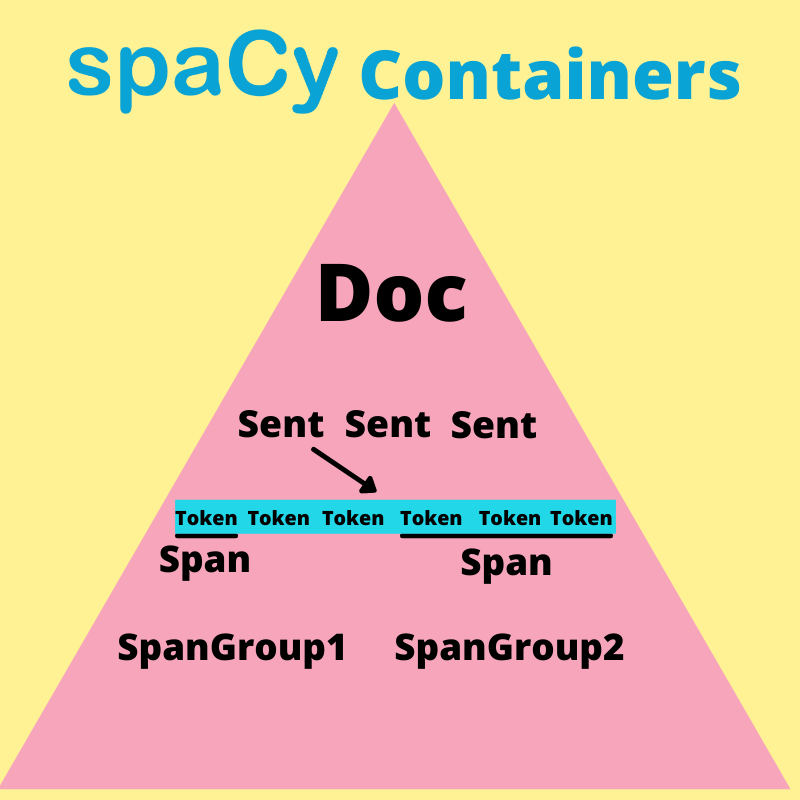

## 2. Getting Started with spaCy and its Linguistic Annotations



In this chapter, we will start working with spaCy directly. The goals of this chapter are twofold. First, it is my hope that you understand the basic spaCy syntax for creating a Doc container and how to call specific attributes of that container. Second, it is my hope that you leave this chapter with a basic understanding of the vast linguistic annotations available in spaCy. While we will not explore all attributes, we will deal with many of the most important ones, such as lemmas, parts-of-speech, and named entities. By the time you are finished with this chapter, you should have enough of a basic understanding of spaCy to begin applying it to your own texts.

### 2.1 Importing Spacy and Loading Data 

In [19]:
import spacy


nlp = spacy.load("en_core_web_sm")
# print(nlp)

with open("F:\spaCy-master\data\wiki_us.txt", "r") as f:
    text = f.read()
    print(text)



The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

### 2.2 Creating a Doc Container 
with the data loaded in it's time to make our Doc container. Unless you are working with multiple Doc containers. it is best practice to always call this object 'doc', all lowercase. To create a doc container, we will usually just call our nlp object and padd our text to it as single argument. 

In [20]:
doc = nlp(text)
print(doc)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

if you know that what is the lengeth of of text and what is the lengeht of document -> if you count the length of document then lengeth are decrease compre to the length of text 

In [21]:
print(len(text))
print(len(doc))

3521
654


The code snippet you’ve provided is a Python loop that iterates over the first 11 characters of a string variable named text and prints each character individually. Here’s a breakdown of what each part of the code does:

for token in text[:11]:: This is a for loop that goes through each element in the sequence text[:11]. The text[:11] is a slice notation that retrieves the first 11 characters from the text string.
print(token): Inside the loop, each character (referred to as token) is printed out on a separate line.
If text is a string, this code will print the first 11 characters of that string. If text is a list or another iterable with at least 11 elements, it will print the first 11 elements of that iterable.

In [22]:
for token in text[:10]:   #  first 11 characters from the text string.
    print(token)

T
h
e
 
U
n
i
t
e
d


 We have printed off each character, including white spaces. Let’s try and do the same with the Doc container.

In [23]:
for token in doc[:10]:
    print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


And now we see the magical difference. While on the surface it may seem that the Doc container’s length is dependent on the quantity of words, look more closely. You should notice that the open and close parentheses are also considered an item in the container. These are all known as tokens. Tokens are a fundamental building block of spaCy or any NLP framework. They can be words or punctuation marks. **Tokens** are something that has syntactic purpose in a sentence and is self-contained. A good example of this is the contraction “don’t” in English. When tokenized, or the process of converting the text into tokens, we will have two tokens. “do” and “n’t” because the contraction represents two words, “do” and “not”.

On the surface, this may not seem exceptional. But it is. You may be thinking to yourself that you could easily use the split method in Python to split by whitespace and have the same result. But you’d be wrong. Let’s see why.

In [24]:
for token in text.split()[:10]:
    print (token)

The
United
States
of
America
(U.S.A.
or
USA),
commonly
known


Notice that the parentheses are not removed or handled individually. To see this more clearly, let's print off all tokens from index 5 to 8 in both the text and doc objects.


In [25]:
word = text.split()[:10]
i = 5 
for token in doc[i:8]:
    print(f"spacy Token {i}: \n {token}\n word split{i}: \n {word[i]} \n\n")

spacy Token 5: 
 (
 word split5: 
 (U.S.A. 


spacy Token 5: 
 U.S.A.
 word split5: 
 (U.S.A. 


spacy Token 5: 
 or
 word split5: 
 (U.S.A. 




We can see clearly now how the spaCy Doc container does much more with its tokenization than a simple split method. We could, surely, write complex rules for a language to achieve the same results, but why bother? SpaCy does it exceptionally well for all languages. In my entire time using spaCy, I have never seen the tokenizer make a mistake. I am sure that mistakes may occur, but these are probably rare exceptions.


### 2.3 Sentence Boundary Detection (SBD)
In NLP, sentence boundary detection, or SBD, is the identification of sentences in a text. Again, this may seem fairly easy to do with rules. One could use split(“.”), but in English we use the period to also denote abbreviation. You could, again, write rules to look for periods not proceeded by a lowercase word, but again, I ask the question, “why bother?”. We can use spaCy and in seconds have all sentences fully separated through SBD.

In [26]:
for sent in doc.sents:
    print (sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22]
With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

 Let’s try and grab index 0 in this attribute.

In [27]:
sentence1 = doc.sents[0]
print (sentence1)

TypeError: 'generator' object is not subscriptable

- The error TypeError: 'generator' object is not subscriptable occurs because doc.sents in spaCy is a generator, and you cannot access elements of a generator using indexing like you would with a list. To fix this error, you can convert the generator to a list first and then access its elements by index. 

In [28]:
sentence1 = list(doc.sents)[0]
print (sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


Now we have the first sentence. Now that we have a smaller text, let’s explore spaCy’s other building block, the token.

### 2.4 TOken Attributes 
the token object contains  a lot of different attributes that are VITAL do performing NLP in spacy. we will be working with a few of them, such as:

* .text 
* .head 
* .left_edge 
* .right_edge 
* .ent_type_
* .iob_
* .lemma_ 
* .morph 
* .pos_ 
* .dep_ 
* .lang_

i will berify describe these here and show you how to grab each one and what they look like. We will be exploring each of these attributes more deeply in this chapter and future and future chapter. To demonstrate each of these attribute. we will use one token, "States" which is part of a sequence of tokens that make up "This united state of America" 

In [29]:
token2 = sentence1[2]
print (token2)

States


#### 2.4.1 Text 

In [30]:
token2.text

'States'

#### 2.4.2 Head 

In [31]:
token2.head

is

In the context of spaCy, an NLP library for Python, head = token2.head is a line of code that assigns the syntactic head of token2 to the variable head. Here’s what this means:

Token: In spaCy, a token is an individual word, punctuation symbol, whitespace, etc., in the processed text1.
Head: The head of a token is the main word that connects it to the rest of the sentence. It’s a central concept in dependency grammar, which is used by spaCy to describe the syntactic structure of a sentence2.
So, token2.head retrieves the token that is the syntactic head of token2. The head is the parent token in the dependency tree, which represents the grammatical structure of the sentence. This relationship helps in understanding the grammatical dependencies between words in a sentence.

For example, in the sentence “The cat sat on the mat,” if token2 is the word “sat,” then token2.head would be “sat” itself, because “sat” is the main verb of the sentence and serves as the head of its own dependency subtree.

#### 2.4.3 Left Edge 


In [32]:
token2.left_edge

The

In spaCy, token2.left_edge refers to the leftmost token of token2’s syntactic descendants in the dependency parse of a sentence1. This means it gives you the earliest token in the sentence that is part of the subtree rooted at token2. The subtree includes token2 and all the tokens that are syntactically dependent on token2.

For example, consider the sentence “I like New York in Autumn.” If token2 is “York,” then token2.left_edge would be “New,” as “New” is the leftmost token in the phrase “New York.”

#### 2.4.4 Right Edge 


In [33]:
token2.right_edge

America

In spaCy, token2.right_edge refers to the rightmost token of token2’s syntactic descendants in the dependency parse of a sentence1. This means it gives you the last token in the sentence that is part of the subtree rooted at token2. The subtree includes token2 and all the tokens that are syntactically dependent on token2.

For instance, if you have the sentence “The quick brown fox jumps over the lazy dog,” and token2 is “fox,” then token2.right_edge would be “dog,” as “dog” is the rightmost token in the phrase “the lazy dog” which is dependent on “fox.”

#### 2.4.5 Entity Type 


In [34]:
token2.ent_type

384

Certainly! In spaCy, token2.ent_type is an attribute that returns the named entity type of the token if it is part of a named entity1. If the token is not part of a named entity, this attribute will return an empty string.

Named entities are real-world objects, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. For example, in the sentence “Paris is the capital of France,” “Paris” and “France” would be recognized as entities of type ‘GPE’ (Geopolitical Entity).

In [35]:
token2.ent_type_

'GPE'

#### 2.4.6 Ent IOB 
IOB code of named entity tag. “B” means the token begins an entity, “I” means it is inside an entity, “O” means it is outside an entity, and "" means no entity tag is set.

In spaCy, token2.ent_iob_ is an attribute that returns the IOB code of the named entity tag associated with the token as a string1. IOB tagging is a common format for tagging tokens in a chunking task, where each token is tagged with one of the following codes:

“I” (Inside): The token is inside an entity. “O” (Outside): The token is outside an entity. “B” (Beginning): The token is the beginning of an entity. This attribute is particularly useful for named entity recognition (NER) tasks, where you want to identify the boundaries of named entities in your text. For example, in a sentence like “Apple is based in California,” if token2 represents “Apple,” token2.ent_iob_ would likely return “B,” indicating that “Apple” is at the beginning of an entity that spans multiple tokens2. 😊

In [36]:
token2.ent_iob_

'I'

IOB is a method of annotating a text. In this case, we see “I” because states is inside an entity, that is to say that it is part of the United States of America.

#### 2.4.7 Lemma


In [37]:
token2.lemma_

'States'

In spaCy, token2.lemma_ is an attribute that returns the lemma of the token as a string1. A lemma is the base or dictionary form of a word. For example, the lemma of “running” is “run,” and the lemma of “mice” is “mouse.”

Lemmatization is the process of reducing a word to its base or root form. This is useful in natural language processing tasks to normalize words so that different forms of the same word are treated as the same item, which can be important for tasks like text analysis, information retrieval, and machine learning.

### 2.4.8 Morph


In [38]:
sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

The code sentence1[12].morph in spaCy is used to access the morphological features of the 13th token in the first sentence of a processed document1. The morph attribute provides detailed information about the grammatical properties of the token, such as tense, number, case, and gender, depending on the language’s morphology.

Here’s a breakdown of the code:

sentence1: This variable is expected to hold the first sentence of a document, which is a Span object in spaCy. [12]: This is an index that specifies the 13th token in the sentence (since indexing starts at 0). .morph: This attribute of a Token object contains the morphological details of the token. For example, if you have a sentence like “The cats are sitting on the mat,” and you process this sentence with spaCy, then sentence1[12].morph would give you the morphological features of the 13th token, if there are that many tokens in the sentence. If the sentence has fewer tokens, trying to access sentence1[12] would result in an IndexError.

To use this attribute correctly, ensure that the sentence has enough tokens to avoid an index out of range error, and remember that the morphological analysis depends on the language model you are using with spaCy. 😊

The output “Aspect=Perf|Tense=Past|VerbForm=Part” is a set of morphological features describing a verb form in a sentence:

Aspect=Perf: This indicates the verb is in the perfect aspect, which means the action is completed. The perfect aspect is used to express an action that has been finished at some point in the past, present, or future1. Tense=Past: This denotes that the verb is in the past tense, referring to an action or state that occurred in the past2. VerbForm=Part: This specifies that the verb form is a participle. In English, participles are verb forms used to make perfect tenses or passive voice. They can also be used as adjectives. The past participle is often formed by adding -ed, -d, -t, -en, or -n to the base form of the verb2. So, when you see “Aspect=Perf|Tense=Past|VerbForm=Part,” it describes a past participle form of a verb that is used to construct perfect tenses, indicating a completed action in the past. An example would be the word “written” in the sentence “The book has been written.” 😊

#### 2.4.9 Part of Speech


In [40]:
token2.pos_

'PROPN'

Certainly! In spaCy, token2.pos_ is an attribute that returns the part-of-speech (POS) tag of the token as a string1. The POS tag represents the grammatical category of the token, such as ‘NOUN’, ‘VERB’, ‘ADJ’ (adjective), etc. These tags are based on the Universal Dependencies scheme, which provides a consistent set of POS tags across different languages1.

For example, if token2 is the word ‘running’ in a sentence, token2.pos_ might return ‘VERB’ to indicate that ‘running’ is being used as a verb in that context.


#### 2.4.10 Language 

In [41]:
token2.lang_

'en'

In spaCy, token2.lang_ is an attribute that would return the language code of the document from which the token originates1. However, it’s important to note that as of my last update, spaCy tokens do not have a lang_ attribute directly associated with them. Instead, the language of the document can be determined by the model loaded into spaCy, as each model is specific to a language (e.g., ‘en_core_web_sm’ for English).

If you’re working with a spaCy Doc object, which represents a processed body of text, you can check the language of the document by accessing the lang_ attribute of the Doc

#### 2.4.11 Syntatic Dependency


In [42]:
token2.dep_

'nsubj'

dep_ stands for dependency tag and is used to get the syntactic dependency relation of a token within a sentence1.

For example, if token2 is a word in a sentence that has been processed by spaCy, token2.dep_ would return the dependency relation of that word to other tokens in the sentence. Dependency relations can be labels like ‘nsubj’ for nominal subject, ‘dobj’ for direct object, etc., which help in understanding the grammatical structure of the sentence.


The output 'nsubj' stands for nominal subject in dependency parsing. It refers to a nominal element that acts as the syntactic subject or the proto-agent of a clause1. This means it is the entity performing the action or the one that the sentence is primarily about. In other words, it’s the “doer” of the action. The nsubj relation is used to connect the subject to the verb it is associated with.

For example, in the sentence “The cat sat on the mat,” ‘The cat’ would be tagged as nsubj because it is the subject performing the action of sitting.

Here’s a breakdown of the term:

Nominal: Pertaining to nouns or noun phrases.
Subject: The part of a sentence or clause that typically indicates what it is about, and which usually comes before the predicate in English1.
In dependency grammar, which focuses on how words relate to each other, identifying the nsubj is crucial for understanding the structure and meaning of sentences.


### 2.5 Part of Speech Tagging (POS)
in the field of computational linguistics, understanding parts-of-speech is essential. spaCy offers an easy way to parse a text and identify its parts of speech. Below, we will iterate across each token (word or punctuation) in the text and identify its part of speech. 

In [43]:
for token in sentence1:
    print (token.text, token.pos_, token.dep_)

The DET det
United PROPN compound
States PROPN nsubj
of ADP prep
America PROPN pobj
( PUNCT punct
U.S.A. PROPN appos
or CCONJ cc
USA PROPN conj
) PUNCT punct
, PUNCT punct
commonly ADV advmod
known VERB acl
as ADP prep
the DET det
United PROPN compound
States PROPN pobj
( PUNCT punct
U.S. PROPN appos
or CCONJ cc
US PROPN conj
) PUNCT punct
or CCONJ cc
America PROPN conj
, PUNCT punct
is AUX ROOT
a DET det
country NOUN attr
primarily ADV advmod
located VERB acl
in ADP prep
North PROPN compound
America PROPN pobj
. PUNCT punct


Here, we can see two vital pieces of information: the string and the corresponding part-of-speech (pos). For a complete list of the pos labels, see the spaCy documentation (https://spacy.io/api/annotation#pos-tagging). Most of these, however, should be apparent, i.e. PROPN is proper noun, AUX is an auxiliary verb, ADJ, is adjective, etc. We can visualize this sentence with a diagram through spaCy’s displaCy Notebook feature.



SyntaxError: only single target (not tuple) can be annotated (127577622.py, line 1)